In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Read the data from the file path
data = pd.read_csv('/content/full_filled_stroke_data (1).csv')

# Separate the features and target variable
X = data.drop('stroke', axis=1)
y = data['stroke']

# Preprocess categorical features
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
X = pd.get_dummies(X, columns=categorical_features)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regression.predict(X_test)

# Calculate mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.10440968958872564
R-squared Score: 0.024929510007512312


In [ ]:
# Import the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset (replace 'dataset.csv' with the actual file name)
dataset = pd.read_csv('/content/breast_cancer_survival.csv')

dataset.dropna(inplace=True)

# Separate the features and target variable
X = dataset.drop('Patient_Status', axis=1)
y = dataset['Patient_Status']

# Perform one-hot encoding on the categorical features
X_encoded = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the KNN model
k_values = range(2, 21)
knn_accuracies = []

for k in k_values:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, y_train)
  knn_y_pred = knn_model.predict(X_test)
  knn_accuracy = accuracy_score(y_test, knn_y_pred)
  knn_accuracies.append(knn_accuracy)

# Print the accuracies for different k values
for k, accuracy in zip(k_values, knn_accuracies): print(f"K = {k}: Accuracy = {accuracy}")

# Choose the best k value based on the results

# Train the final KNN model with the selected k value
best_k = k_values[knn_accuracies.index(max(knn_accuracies))]
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)

K = 2: Accuracy = 0.765625
K = 3: Accuracy = 0.765625
K = 4: Accuracy = 0.796875
K = 5: Accuracy = 0.8125
K = 6: Accuracy = 0.796875
K = 7: Accuracy = 0.796875
K = 8: Accuracy = 0.796875
K = 9: Accuracy = 0.796875
K = 10: Accuracy = 0.796875
K = 11: Accuracy = 0.78125
K = 12: Accuracy = 0.796875
K = 13: Accuracy = 0.796875
K = 14: Accuracy = 0.796875
K = 15: Accuracy = 0.796875
K = 16: Accuracy = 0.796875
K = 17: Accuracy = 0.796875
K = 18: Accuracy = 0.796875
K = 19: Accuracy = 0.796875
K = 20: Accuracy = 0.796875


KNeighborsClassifier()

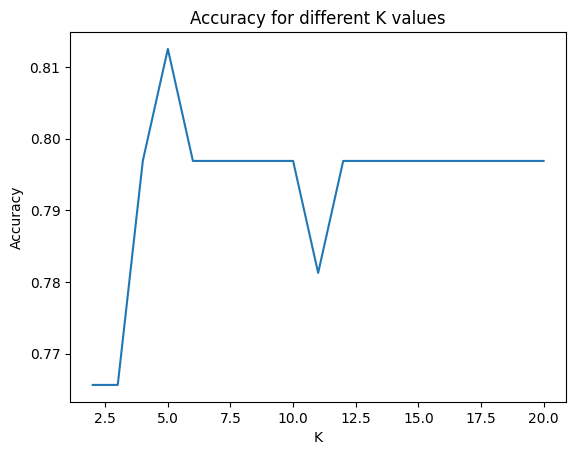

In [ ]:
import matplotlib.pyplot as plt

k_values = range(2, 21)
accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    accuracy = knn_model.score(X_test, y_test)
    accuracies.append(accuracy)

# Plot the graph
plt.plot(k_values, accuracies)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy for different K values")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Calculate the accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, pos_label=1)
recall = recall_score(y_test_encoded, y_pred_encoded, pos_label=1)
f1 = f1_score(y_test_encoded, y_pred_encoded)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.765625
Precision: 0.25
Recall: 0.07692307692307693
F1-score: 0.11764705882352941


Length of k_values: 19
Length of accuracies: 19
Accuracies: [0.765625, 0.765625, 0.796875, 0.8125, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875, 0.78125, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875]


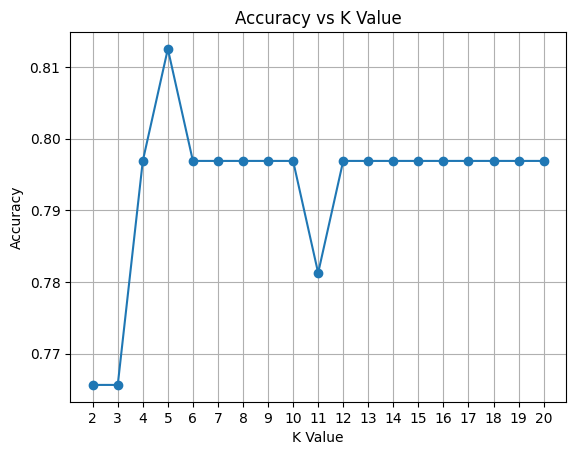

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Read the data with pandas
data = pd.read_csv("/content/breast_cancer_survival.csv")

# Drop any rows with missing values
data.dropna(inplace=True)

# Features are all columns except the target
features = data.drop(columns=[data.columns[-1]])

# Target variable
target = data.columns[-1]

# Encode categorical variables
features_encoded = pd.get_dummies(features)

# Train KNN
X = features_encoded.values
y = data[target].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find accuracy for different K values[2-20], plot a graph(X-axis=K, Y-axis=accuracy)
k_values = range(2, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
print("Length of k_values:", len(k_values))
print("Length of accuracies:", len(accuracies))
print("Accuracies:", accuracies)

# Plotting the graph
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Evaluate Decision Tree
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Determine unique labels in y_test
unique_labels = np.unique(y_test)

# Choose a valid label as the positive class
# Let's choose the first unique label as an example
pos_label = unique_labels[0]

# Compute precision, recall, and F1-score
precision_dt = precision_score(y_test, y_pred_dt, pos_label=pos_label)
recall_dt = recall_score(y_test, y_pred_dt, pos_label=pos_label)
f1_score_dt = f1_score(y_test, y_pred_dt, pos_label=pos_label)

# Compare both models
print("KNN Accuracy:", max(accuracies))
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Precision:", precision_dt)
print("Decision Tree Recall:", recall_dt)
print("Decision Tree F1-score:", f1_score_dt)

KNN Accuracy: 0.8125
Decision Tree Accuracy: 0.765625
Decision Tree Precision: 0.7903225806451613
Decision Tree Recall: 0.9607843137254902
Decision Tree F1-score: 0.8672566371681416


In [ ]:
import pandas as pd
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read the data from the provided string
data_string = """gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.555602417555065,never smoked,1
Female,59.0,0,0,Yes,Private,Rural,76.15,30.24293671780551,Unknown,1
...
Female,80.0,1,0,Yes,Private,Urban,83.75,29.09742107186247,never smoked,0"""

data = pd.read_csv(StringIO(data_string), sep=",")

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Read the data from the file path
data = pd.read_csv('/content/full_filled_stroke_data (1).csv')

# Split the data into features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Preprocess categorical features
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
one_hot_encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X = one_hot_encoder.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y_test, y_pred, zero_division=0)
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")

Accuracy: 0.8780487804878049
Precision: 0.0
Recall: 0.0
F1-score: 0.0
